# Processo de Execução 

- O código vai ler um arquivo CSV;
- Cada tabela selecionada vira um Dataframa;
- É feita uma filtragem nas variaveis do Dataframa;
- Aplicação de Modelos é feita

### Import de Bibliotecas

In [1]:

# __Bibliotecas
import pandas as pd
#import uetl
#import psycopg2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


from collections import Counter
from skrebate import ReliefF
from skrebate import SURF
from skrebate import MultiSURF
from sklearn.pipeline import Pipeline
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import learning_curve
from sklearn.metrics import RocCurveDisplay

# __Modelos
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


# __Install
# python -m pip install seaborn
# pip install -U scikit-learn


In [2]:
# Precisão dos dados em cinco casas decimais
%precision % .2f
pd.options.display.float_format = '{:,.5f}'.format


#  Descrição do Database
- Dataset tratado no postgreSQL/Hospedagem em LocalHost
- 1010 Registros;
- 110.417 Campos;
- 119 Colunas/Variaveis;
- 14 Variáveis do Experimento

Variáveis referentes a avaliação clínica, social e neurologica de pacientes de 70 múnicipios do estado do Pará, avaliando o perfil de casos e contatos de hanseniase no período de 2016 a 2020. 

Todos os dados foram coletados mediante ações de acompanhamento de pacientes através de um aplicativo Andoid, o Hansys, cuja manipulação é feita por profissionais do Laboratório de Dermato-Imunologia (LDI).

Será utilizando um subset de dados do Hansys de 2016 a 2020 (correspondendo A 25 variaveis) para fins de teste dos modelos.

## Selecionando tabela do DataWarehouse 
Cada tabela é tranformada em um Dataframe
- dataset_paciente: dados Socioeconômico, Laboratoriais e Clínicos de pacientes;
- dataset_comunicante: dados de comunicantes
- dataset_neurologicas: dados da avaliação neurologica de pacientes

In [3]:
# __Conexão com o dataset em CSV
df_hansys = pd.read_csv('dataset_paciente.csv', sep=';')


In [4]:
# __Informações sobre as variáveis numéricas
df_hansys.describe()


,prontuario,idade,rec_qtd_episo,rec_num_tron_afet,rec_num_tron_afet_info,rec_bacil_ib,rec_bacil_im,rec_reachans_peri,rec_apre_hans_pos_desc,cont_hans_conv_qtd,...,id_cicac_bcg,baciloscopia,grau_incapacidade,status_hans,id_cidade,id_renda,status_casonovo,id_tipopaciente,id_numlesao,id_formaclin
count,915.000000,915.000000,915.000000,915.000000,915.0,915.000000,915.0,915.000000,915.0,915.000000,...,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,19638.200000,37.196721,0.004372,0.003279,0.0,0.003279,0.0,0.013115,0.0,0.575956,...,0.638251,0.187978,0.267760,1.313661,33.244809,3.010929,1.313661,1.750820,0.436066,2.671038
std,30091.628191,19.909109,0.080904,0.073890,0.0,0.099177,0.0,0.396708,0.0,0.846844,...,0.995208,0.528889,0.542906,0.466585,21.953880,1.502693,0.466585,0.957058,0.916067,2.418017
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4408.500000,20.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,5560.000000,37.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,35.000000,3.000000,1.000000,1.000000,0.000000,2.000000
75%,50004.000000,53.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000,...,2.000000,0.000000,0.000000,2.000000,54.000000,5.000000,2.000000,3.000000,0.000000,5.000000
max,641369.000000,90.000000,2.000000,2.000000,0.0,3.000000,0.0,12.000000,0.0,5.000000,...,3.000000,2.000000,2.000000,2.000000,66.000000,6.000000,2.000000,4.000000,4.000000,7.000000


In [5]:
# __ Exibe informações do DataFrame
df_hansys.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Columns: 119 entries, prontuario to domi_estado
dtypes: int64(39), object(80)
memory usage: 850.8+ KB


## Selecionando um conjunto de dados
   - **Atributos:** 15
   - **Renomeia Variaveis**
   - **Alvo:** Está doente ou não

In [ ]:
# Convertendo características do tipo str para categorias numéricas
caracteristicas = ["estado_civil", "etnia", "diag_grau_incap", "lab_hist"]


def categorizacao(caracteristicas):
    x = []
    for caracteristica in caracteristicas:
        hansys_cat = df_hansys[caracteristica]

        # hansys_cat_encoded é a feature catecorizada de forma numérica | hansys_cat_categories é o mapeamento das categorias
        hansys_cat_encoded, hansys_cat_categories = hansys_cat.factorize()

        # armazenar as categorias
        x.append(hansys_cat_categories)

        df_hansys[caracteristica] = hansys_cat_encoded

    return x, df_hansys


map_categories, hansys_cat = categorizacao(caracteristicas)


In [7]:
# Seleciona variáveis especificas
df_varSelecionadas = hansys_cat[['id_idade', 'id_renda',
                                'id_genero', 'status_hans', 'grau_escolaridade',
                                 'gov_opc', 'status_casonovo', 'id_tipopaciente',
                                 'id_numlesao', 'id_cicac_bcg', 'id_trat',
                                 'class_opera', 'id_formaclin', 'baciloscopia',
                                 'estado_civil', 'etnia', 'diag_grau_incap',
                                 'cont_hans_conv_qtd']]
                            

""" Características retiradas: 'pgl_17', 'pgl_18', 'pgl_19', 'pgl_20', 'pcr_16', 'pcr_17', 'pcr_18', 'pcr_19', 'pcr_20', 'lab_hist' 'id_cidade' """


# Renomeia nome de Variaveis

novo_nome_cols = {'id_idade': 'Idade',
                  'id_cidade': 'Número Cidade',
                  'id_renda': 'Renda Familiar',
                  'id_genero': 'Gênero do Paciente',
                  'status_hans': 'Status do Paciente',
                  'grau_escolaridade': 'Grau de Escolaridade',
                  'gov_opc': 'Convêncio Governo',
                  'status_casonovo': 'Status de Novo Caso',
                  'id_tipopaciente': 'Tipo do Paciente',
                  'id_numlesao': 'Número de Lesões',
                  'id_cicac_bcg': 'Marca da BCG',
                  'id_trat': 'Tratamento',
                  'class_opera': 'Classificação',
                  'id_formaclin': 'Forma Clinica',
                  'baciloscopia': 'Baciloscopia'}


df_varSelecionadas = df_varSelecionadas.rename(columns=novo_nome_cols)

df_varSelecionadas.head()


,Idade,Renda Familiar,Gênero do Paciente,Status do Paciente,Grau de Escolaridade,Convêncio Governo,Status de Novo Caso,Tipo do Paciente,Número de Lesões,Marca da BCG,Tratamento,Classificação,Forma Clinica,Baciloscopia,estado_civil,etnia,diag_grau_incap,cont_hans_conv_qtd
0,3,2,1,2,3,1,2,3,0,0,0,0,0,0,0,0,0,2
1,3,2,1,1,1,2,1,1,0,0,0,2,1,0,1,0,1,0
2,2,5,1,1,3,2,1,1,0,3,0,0,0,0,0,1,0,0
3,1,3,1,1,2,2,1,1,2,2,0,2,5,0,0,0,0,0
4,1,5,1,1,1,2,1,1,1,0,0,2,5,0,2,0,2,0


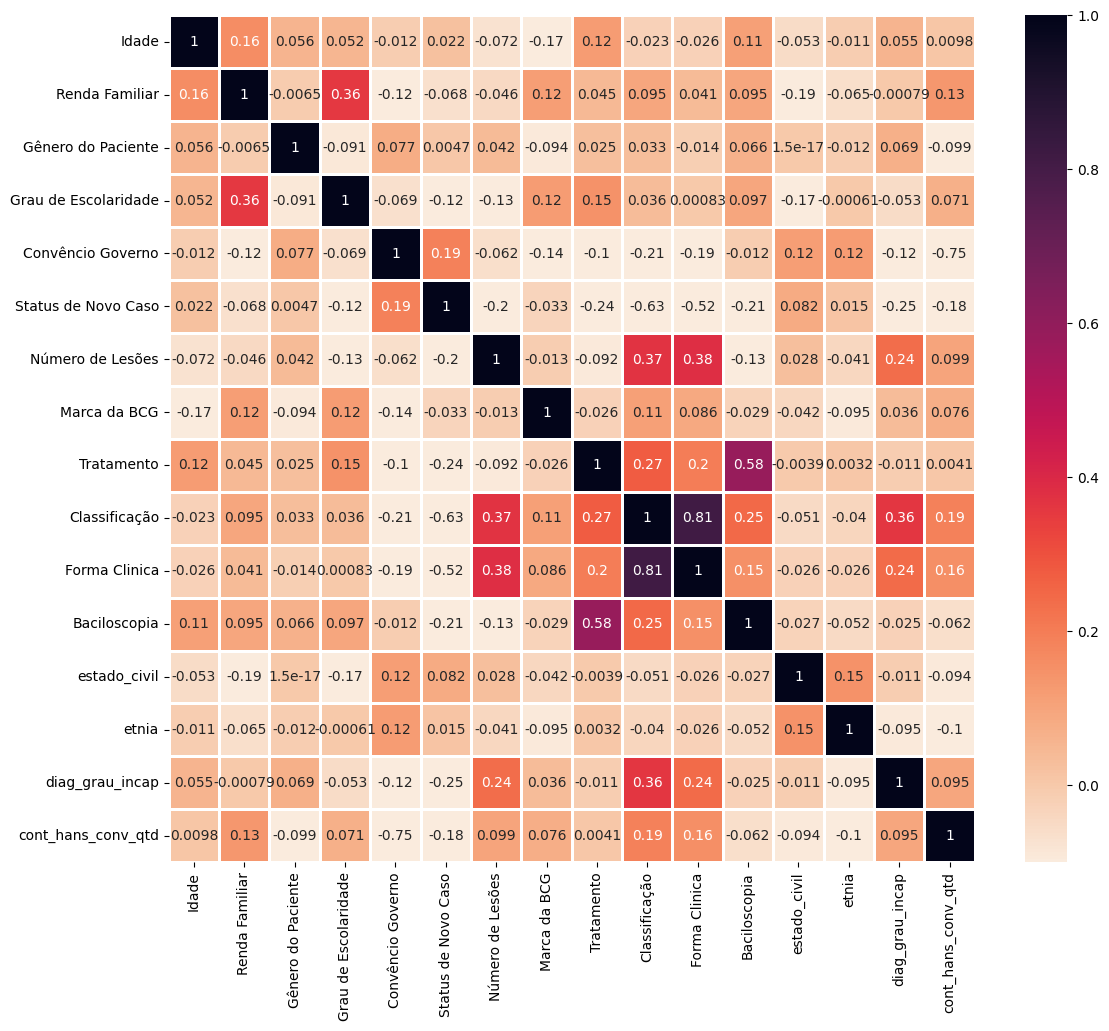

In [8]:
# Correlação das características
# Status do Paciente e Tipo do Paciente não foram utilizadas nos modelos

atributos = df_varSelecionadas.drop(['Status do Paciente', 'Tipo do Paciente'], axis=1)
plt.subplots(figsize=(13,11))
corr = atributos.corr()
ax = sns.heatmap(corr, annot=True, vmax=0, vmin=1, linewidths=1.8, cmap="rocket_r")

In [6]:
"""Calculando a entropia"""

from scipy.stats import entropy

def calcular_entropia(dataframe):
    valores_entropia = []

    atributos = list(dataframe.columns)
    for atributo in atributos:
    
        counts = dataframe[atributo].value_counts()
        entropia = entropy(counts, base=2)
        valores_entropia.append(entropia)

    return valores_entropia

valores_entropia = calcular_entropia(df_varSelecionadas)
atributos = list(df_varSelecionadas.columns)

entropia = pd.DataFrame(list(zip(atributos, valores_entropia)), columns=['Atributos', 'Entropia'])
entropia = entropia.sort_values(by='Entropia', ascending=False)
print(entropia)


               Atributos  Entropia
1         Renda Familiar   2.34788
12         Forma Clinica   2.16671
0                  Idade   2.14312
14          estado_civil   2.06165
15                 etnia   1.69170
4   Grau de Escolaridade   1.58703
17    cont_hans_conv_qtd   1.47928
7       Tipo do Paciente   1.43926
8       Número de Lesões   1.19474
11         Classificação   1.13079
9           Marca da BCG   1.11029
2     Gênero do Paciente   1.02027
5      Convêncio Governo   0.99377
16       diag_grau_incap   0.95631
3     Status do Paciente   0.91032
6    Status de Novo Caso   0.89859
10            Tratamento   0.71918
13          Baciloscopia   0.66698


In [9]:

# Selecionando as colunas de entradas e a coluna de saída
# As característica 'Status do paciente' e 'Tipo de Paciente' estão muito relacionadas com a sáida e fazem com que qualquer modelo utilizado tenha acurácia de 100%
# E por isso foram retiradas
features = df_varSelecionadas.drop(
    ['Status de Novo Caso', 'Status do Paciente', 'Tipo do Paciente'], axis=1).values
labels = df_varSelecionadas['Status de Novo Caso'].values


# Funções criadas 

In [10]:
def numero_caracteristicas(X_train, X_test, y_train, y_test, total_carac, modelo, relief):

    print(f'Isso pode demorar alguns minutos. Aguarde...')

    valores_cross = []

    if(modelo) == 'modelo_rna':
        modelo = MLPClassifier(hidden_layer_sizes=(
            24,), activation='relu', max_iter=100000, momentum=0.9, learning_rate_init=0.01)

    if(modelo) == 'modelo_rf':
        modelo = RandomForestClassifier(n_estimators=100)

    if(modelo) == 'modelo_svm':
        modelo = SVC()

    for n in range(1, total_carac + 1):

        if relief == 'ReliefF':
            fs = ReliefF(n_features_to_select=n)

        if relief == 'SURF':
            fs = SURF(n_features_to_select=n)

        if relief == 'MultiSURF':
            fs = MultiSURF(n_features_to_select=n)

        X_train_n = fs.fit_transform(X_train, y_train)
        X_test_n = fs.transform(X_test)

        #Aumentar o número de amostras da classe minoritária para 90% da classe majoritária
        over = SMOTE(sampling_strategy=0.9, k_neighbors=5)

        # Retirar amostras da classe majoritária para igualar a quantidade de cada classe
        under = RandomUnderSampler(sampling_strategy=1)

        X_train_bal, y_train_bal = over.fit_resample(X_train_n, y_train)
        X_train_bal, y_train_bal = under.fit_resample(X_train_bal,y_train_bal)

        scaler = StandardScaler()
        scaler.fit(X_train_bal)

        X_train_bal = scaler.transform(X_train_bal)
        X_test_n = scaler.transform(X_test_n)

        modelo.fit(X_train_bal, y_train_bal)
        predicoes = modelo.predict(X_test_n)
        confusion_matrix(y_test, predicoes)

        # Cross Validação
        # ''roc_auc: Característica de Operação do Receptor
        scores = cross_val_score(
            modelo, X_train_bal, y_train_bal, cv=10, scoring='roc_auc')

        mostrar_cross_val = np.mean(scores)
        valores_cross.append(mostrar_cross_val)


    index = [p for p in range(1, total_carac + 1)]

    valores_acuracia = pd.DataFrame(list(zip(index, valores_cross)), columns=[
                                    'Qtd Características', 'Cross Validação'])
    valores_acuracia = valores_acuracia.sort_values(
        by='Cross Validação', ascending=False).set_index('Qtd Características')

    return valores_acuracia


In [11]:
def modelo_rede_neural(X_train, X_test, y_train, y_test):

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model_rna = MLPClassifier(hidden_layer_sizes=(
        5,), activation='relu', max_iter=10000, momentum=0.9, learning_rate_init=0.001)
    model_rna.fit(X_train, y_train)
    predicoes_RN = model_rna.predict(X_test)

    # Pipeline: Alternativa para criar o modelo,fazer o treinamento e as previsões
    #pipe = Pipeline([('fs', fs), ('stdScaler', StandardScaler()), ('model_rna', model_rna)])
    #pipe.fit(X_train, y_train)
    #y_pred = pipe.predict(X_test)

    print('Valor RN sem Cross Validação: \n')
    matriz_confusao = confusion_matrix(y_test, predicoes_RN)
    print(matriz_confusao)
    print(classification_report(y_test, predicoes_RN))
    
    sns.heatmap(matriz_confusao, cmap='YlGnBu', annot=True,fmt='3')

    plt.title('Confusion Matrix RNA')

    plt.ylabel('Real Values')
    plt.xlabel('Prediction Valeus')

    plt.show()

    # Cross Validação
    # ''roc_auc: Característica de Operação do Receptor
    scores = cross_val_score(
        model_rna, X_train, y_train, cv=10, scoring='roc_auc')

    mostrar_cross_val = np.mean(scores)

    print('[MODELO DE REDE NEURAL] Média f1-score dos 10 modelos com Cross Validação da base Treinamento:')
    print(f'{mostrar_cross_val} \n')


In [49]:
def modelo_random_forest(X_train, X_test, y_train, y_test):

    # __Etapa de treinamento
    Modelo_RF = RandomForestClassifier(n_estimators=50)
    Modelo_RF.fit(X_train, y_train)

    # __Etapa de previsão
    Modelo_RF.fit(X_train, y_train)
    Predicoes_RF = Modelo_RF.predict(X_test)

    """
    for i in range(5):
        Modelo_RF.fit(X_train, y_train)
        Predicoes_RF = Modelo_RF.predict(X_test)
        print(f'Iteração {i}: \n')
        print(classification_report(y_test, Predicoes_RF))
    """

    # __Sem Cross Validação
    
    print('Valor RF sem Cross Validação: \n')
    matriz_confusao = confusion_matrix(y_test, Predicoes_RF)
    print(matriz_confusao)
    print(classification_report(y_test, Predicoes_RF))
    
    sns.heatmap(matriz_confusao, cmap='YlGnBu', annot=True,fmt='3')

    plt.title('Confusion Matrix RF')

    plt.ylabel('Real Values')
    plt.xlabel('Prediction Valeus')

    plt.show()

    # __RF Com Cross Validação

    # Modelo_RF = RandomForestClassifier(n_estimators=3)
    scores = cross_val_score(
        Modelo_RF, X_train, y_train, cv=10, scoring='roc_auc')

    mostrar_cross_val = np.mean(scores)

    print('[MODELO DE RAMDOM FOREST] Média f1-score dos 10 modelos com Cross Validação da base Treinamento:')
    print(f'{mostrar_cross_val} \n')


In [13]:
def modelo_svm(X_train, X_test, y_train, y_test):

    # __Etapa de treinamento
    Modelo_SVM = SVC()
    Modelo_SVM.fit(X_train, y_train)

    # __Etapa de previsão
    Predicoes_SVM = Modelo_SVM.predict(X_test)

    # __Sem Cross Validação

    print('Valor SVM sem Cross Validação: \n')
    matriz_confusao = confusion_matrix(y_test, Predicoes_SVM)
    print(matriz_confusao)
    print(classification_report(y_test, Predicoes_SVM))
    
    sns.heatmap(matriz_confusao, cmap='YlGnBu', annot=True,fmt='3')

    plt.title('Confusion Matrix SVM')

    plt.ylabel('Real Values')
    plt.xlabel('Prediction Valeus')

    plt.show()

    # __Etapa de treinamento

    Modelo_SVM.fit(X_train, y_train)

    # Com Cross Validação

    Modelo_SVM = SVC()

    scores = cross_val_score(
        Modelo_SVM, X_train, y_train, cv=10, scoring='roc_auc')

    mostrar_cross_val = np.mean(scores)
    print('[MODELO SVM] Média f1-score dos 10 modelos com Cross Validação da base Treinamento:')
    print(f'{mostrar_cross_val} \n')


In [14]:
def executar_modelo(X_train, X_test, y_train, y_test, modelo):
    """ Selecionar qual tipo de modelo será executado
    Parâmetro
    ----------
    modelo: tipo de modelo de machine learning que será executado. Possui as opções abaixo:
        *modelo_rna : para rede neural 
        *modelo_rf : para random forest
        *modelo_svm : para smv
        *all: para executar todos os três modelos acima
    """

    if(modelo == 'modelo_rna' or modelo == 'all'):
        modelo_rede_neural(X_train, X_test, y_train, y_test)

    if(modelo == 'modelo_rf' or modelo == 'all'):
        modelo_random_forest(X_train, X_test, y_train, y_test)

    if(modelo == 'modelo_svm' or modelo == 'all'):
        modelo_svm(X_train, X_test, y_train, y_test)


# Feature Selection utilizando ReliefF

In [15]:

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42)

# Tipo de relief e o número de características que serão selecionadas
fs = ReliefF(n_features_to_select=14)

# Treinando o Relief e transformando as entradas em X para ter somente as 15 melhores características
X_train = fs.fit_transform(X_train, y_train)
X_test = fs.transform(X_test)

reliefF_caracteristicas = df_varSelecionadas.drop(
    ['Status de Novo Caso', 'Status do Paciente', 'Tipo do Paciente'], axis=1).columns
reliefF_pontuacao = fs.feature_importances_

# Transformando em um dataframe para visualizar e ordenar de acordo com a pontuação atribuida pelo reliefF
ReliefF_values = pd.DataFrame(list(zip(reliefF_caracteristicas, reliefF_pontuacao)), columns=[
                              'Característica', 'Pontuação'])
ReliefF_values = ReliefF_values.sort_values(by='Pontuação', ascending=False)
print(ReliefF_values)


          Característica  Pontuação
8          Classificação    0.37357
9          Forma Clinica    0.26094
4      Convêncio Governo    0.06068
0                  Idade    0.05137
11          estado_civil    0.03529
14    cont_hans_conv_qtd    0.02969
13       diag_grau_incap    0.02595
7             Tratamento    0.02354
1         Renda Familiar    0.02192
2     Gênero do Paciente    0.02037
3   Grau de Escolaridade    0.01767
6           Marca da BCG    0.01202
12                 etnia    0.01181
10          Baciloscopia    0.01029
5       Número de Lesões    0.00870


### Utilizando ReliefF no modelo de Rede neural

Valor RN sem Cross Validação: 

[[95 23]
 [24 41]]
              precision    recall  f1-score   support

           1       0.80      0.81      0.80       118
           2       0.64      0.63      0.64        65

    accuracy                           0.74       183
   macro avg       0.72      0.72      0.72       183
weighted avg       0.74      0.74      0.74       183



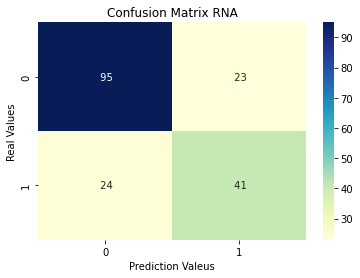

[MODELO DE REDE NEURAL] Média f1-score dos 10 modelos com Cross Validação da base Treinamento:
0.813540804464078 



In [193]:
executar_modelo(X_train, X_test, y_train, y_test, 'modelo_rna')


### Utilizando ReliefF no modelo de Random Forest

Valor RF sem Cross Validação: 

[[104  14]
 [ 18  47]]
              precision    recall  f1-score   support

           1       0.85      0.88      0.87       118
           2       0.77      0.72      0.75        65

    accuracy                           0.83       183
   macro avg       0.81      0.80      0.81       183
weighted avg       0.82      0.83      0.82       183



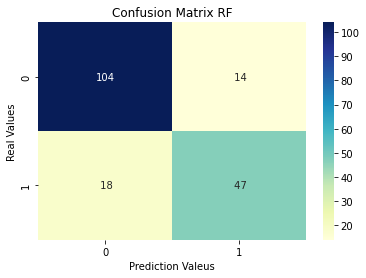

[MODELO DE RAMDOM FOREST] Média f1-score dos 10 modelos com Cross Validação da base Treinamento:
0.8602368441447725 



In [194]:
executar_modelo(X_train, X_test, y_train, y_test, 'modelo_rf')


### Utilizando ReliefF no modelo SVM

Valor SVM sem Cross Validação: 

[[95 23]
 [13 52]]
              precision    recall  f1-score   support

           1       0.88      0.81      0.84       118
           2       0.69      0.80      0.74        65

    accuracy                           0.80       183
   macro avg       0.79      0.80      0.79       183
weighted avg       0.81      0.80      0.81       183



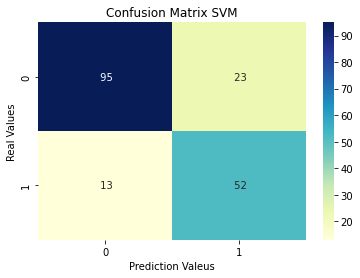

[MODELO SVM] Média f1-score dos 10 modelos com Cross Validação da base Treinamento:
0.8641443850267381 



In [195]:
executar_modelo(X_train, X_test, y_train, y_test, 'modelo_svm')


# Feature Selection utilizando MultiSURF

In [50]:

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42)
fs = MultiSURF(n_features_to_select=15, verbose=True)
fs.fit(X_train, y_train)

X_train = fs.fit_transform(X_train, y_train)
X_test = fs.transform(X_test)

multisurf_caracteristicas = df_varSelecionadas.drop(
    ['Status de Novo Caso', 'Status do Paciente', 'Tipo do Paciente'], axis=1).columns
multisurf_pontuacao = fs.feature_importances_

# for feature_name, feature_score in zip(df_varSelecionadas.drop('Status de Novo Caso', axis=1).columns, fs.feature_importances_):
#    print(feature_name, '\t', feature_score)

multisurf_values = pd.DataFrame(list(zip(
    multisurf_caracteristicas, multisurf_pontuacao)), columns=['Característica', 'Pontuação'])
multisurf_values.sort_values(by='Pontuação', ascending=False)


Created distance array in 0.07906126976013184 seconds.
Feature scoring under way ...
Completed scoring in 8.362604856491089 seconds.
Created distance array in 0.013743877410888672 seconds.
Feature scoring under way ...
Completed scoring in 8.741624116897583 seconds.


,Característica,Pontuação
8,Classificação,0.30626
9,Forma Clinica,0.20109
7,Tratamento,0.00509
13,diag_grau_incap,-0.00092
10,Baciloscopia,-0.00357
4,Convêncio Governo,-0.01686
5,Número de Lesões,-0.01803
0,Idade,-0.02607
6,Marca da BCG,-0.03278
3,Grau de Escolaridade,-0.03730


### Utilizando MultiSURF no modelo de Rede neural

Valor RN sem Cross Validação: 

[[107  18]
 [ 10  48]]
              precision    recall  f1-score   support

           1       0.91      0.86      0.88       125
           2       0.73      0.83      0.77        58

    accuracy                           0.85       183
   macro avg       0.82      0.84      0.83       183
weighted avg       0.86      0.85      0.85       183



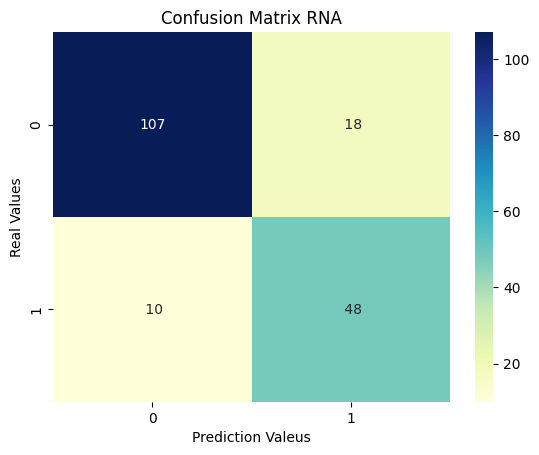

[MODELO DE REDE NEURAL] Média f1-score dos 10 modelos com Cross Validação da base Treinamento:
0.845917306052856 



In [17]:
executar_modelo(X_train, X_test, y_train, y_test, 'modelo_rna')

### Utilizando MultiSURF no modelo de Random Forest

Valor RF sem Cross Validação: 

[[112  13]
 [ 13  45]]
              precision    recall  f1-score   support

           1       0.90      0.90      0.90       125
           2       0.78      0.78      0.78        58

    accuracy                           0.86       183
   macro avg       0.84      0.84      0.84       183
weighted avg       0.86      0.86      0.86       183



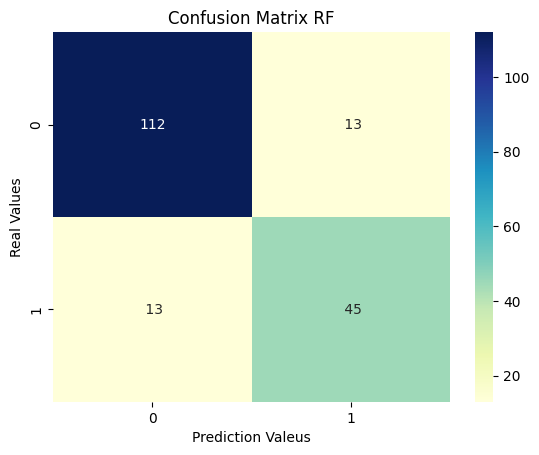

[MODELO DE RAMDOM FOREST] Média f1-score dos 10 modelos com Cross Validação da base Treinamento:
0.8572651321398125 



In [51]:
executar_modelo(X_train, X_test, y_train, y_test, 'modelo_rf')

### Utilizando MultiSURF no modelo de SVM

Valor SVM sem Cross Validação: 

[[107  18]
 [  7  51]]
              precision    recall  f1-score   support

           1       0.94      0.86      0.90       125
           2       0.74      0.88      0.80        58

    accuracy                           0.86       183
   macro avg       0.84      0.87      0.85       183
weighted avg       0.88      0.86      0.87       183



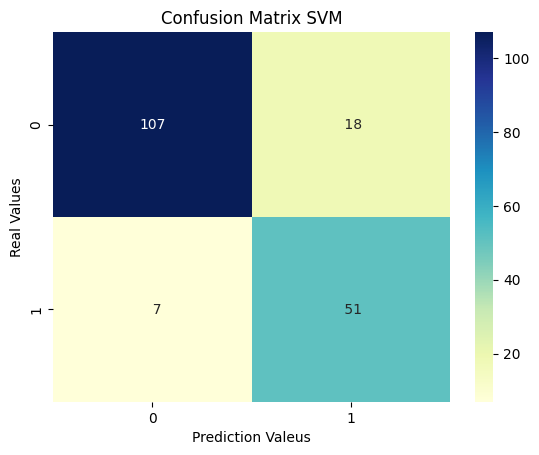

[MODELO SVM] Média f1-score dos 10 modelos com Cross Validação da base Treinamento:
0.8508883205456096 



In [19]:
executar_modelo(X_train, X_test, y_train, y_test, 'modelo_svm')

# SMOTE (Synthetic Minority Oversampling TEchnique) 

Balanceamento antes: Counter({1: 501, 2: 230}) 
Balanceamento depois: Counter({1: 450, 2: 450})

Valor RN sem Cross Validação: 

[[110  15]
 [  8  50]]
              precision    recall  f1-score   support

           1       0.93      0.88      0.91       125
           2       0.77      0.86      0.81        58

    accuracy                           0.87       183
   macro avg       0.85      0.87      0.86       183
weighted avg       0.88      0.87      0.88       183



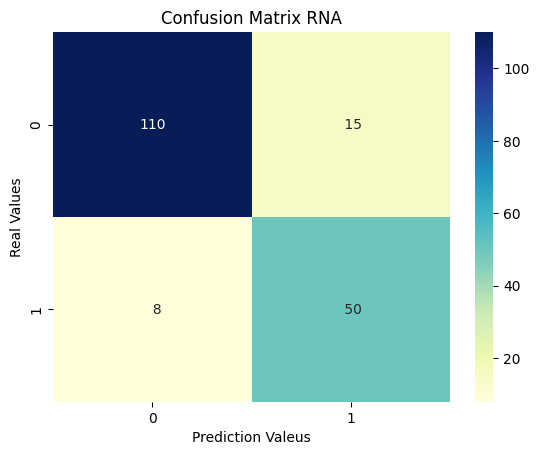

[MODELO DE REDE NEURAL] Média f1-score dos 10 modelos com Cross Validação da base Treinamento:
0.8724197530864197 

Valor RF sem Cross Validação: 

[[109  16]
 [ 10  48]]
              precision    recall  f1-score   support

           1       0.92      0.87      0.89       125
           2       0.75      0.83      0.79        58

    accuracy                           0.86       183
   macro avg       0.83      0.85      0.84       183
weighted avg       0.86      0.86      0.86       183



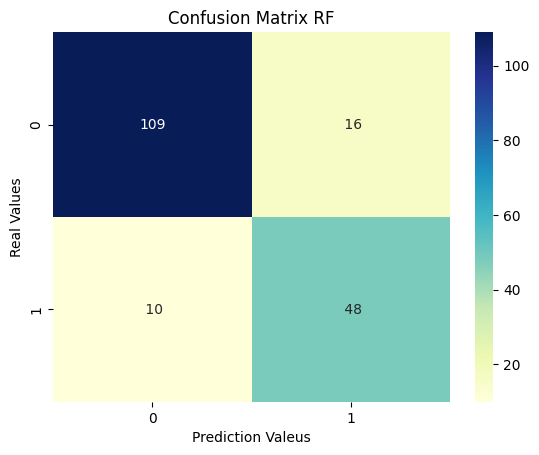

[MODELO DE RAMDOM FOREST] Média f1-score dos 10 modelos com Cross Validação da base Treinamento:
0.909679012345679 

Valor SVM sem Cross Validação: 

[[107  18]
 [  7  51]]
              precision    recall  f1-score   support

           1       0.94      0.86      0.90       125
           2       0.74      0.88      0.80        58

    accuracy                           0.86       183
   macro avg       0.84      0.87      0.85       183
weighted avg       0.88      0.86      0.87       183



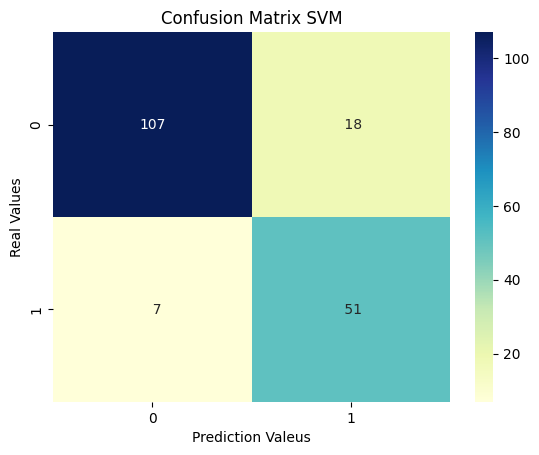

[MODELO SVM] Média f1-score dos 10 modelos com Cross Validação da base Treinamento:
0.8839753086419753 



In [52]:
""" 
    Processo de sobre-amostragem na classe minoritária
    https://arxiv.org/abs/1106.1813

"""

#Aumentar o número de amostras da classe minoritária para 90% da classe majoritária
over = SMOTE(sampling_strategy=0.9, k_neighbors=5)

# Retirar amostras da classe majoritária para igualar a quantidade de cada classe
under = RandomUnderSampler(sampling_strategy=1)

X_train_bal, y_train_bal = over.fit_resample(X_train,y_train)
X_train_bal, y_train_bal = under.fit_resample(X_train_bal,y_train_bal)

y_train_bal.reshape(-1, 1)
df_aux = np.append(X_train_bal, y_train_bal.reshape(-1, 1), axis=1)

df_balanceado = pd.DataFrame(list(df_aux), columns=['id_idade', 'id_renda',
                                'id_genero', 'grau_escolaridade','gov_opc','id_numlesao', 'id_cicac_bcg', 'id_trat',
                                 'class_opera', 'id_formaclin', 'baciloscopia',
                                 'estado_civil', 'etnia', 'diag_grau_incap',
                                 'cont_hans_conv_qtd', 'Status de Novo Caso'])
df_shuffled=sklearn.utils.shuffle(df_balanceado)

X_train_shuffled = df_shuffled.drop(['Status de Novo Caso'], axis=1).values
y_train_shuffled = df_shuffled['Status de Novo Caso'].values


# Imprimir a proporção das classes antes e depois do processo de balanceamento
balanc_antes = Counter(y_train)
balanc_depois = Counter(y_train_bal)

print(f'Balanceamento antes: {balanc_antes} \nBalanceamento depois: {balanc_depois}\n')
# Treinar e executar o modelo com os dados balanceados
executar_modelo(X_train_shuffled, X_test, y_train_shuffled, y_test, 'all') #Modelo Random Forest obteve melhor desempenho


# Curva de Aprendizado

In [122]:

modelo_rna = MLPClassifier(hidden_layer_sizes=(
        5,), activation='relu', max_iter=10000, momentum=0.9, learning_rate_init=0.01)

modelo_rf = RandomForestClassifier(n_estimators=50)

svm = SVC()

In [36]:

def curva_de_aprendizado(modelo, X_train_shuffled, y_train_shuffled):

    sizes, training_scores, testing_scores = learning_curve(modelo, X_train_shuffled, y_train_shuffled, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 0.9, 50), shuffle=True, random_state = 42)
    mean_training = np.mean(training_scores, axis=1)
    std_training = np.std(training_scores, axis=1)

    mean_testing = np.mean(testing_scores, axis=1)
    std_testing = np.std(testing_scores, axis=1)

    plt.subplots(figsize=(6,4))
    plt.plot(sizes, mean_training, '--', linewidth=2,color="darkslategrey",  label="Training (Score)")
    plt.plot(sizes, mean_testing, linewidth=2, color="orangered", label="Test (Score)")
    # plt.fill_between(sizes, mean_training - std_training, mean_training + std_training, color='#DDDDDD')
    # plt.fill_between(sizes, mean_testing - std_testing, mean_testing + std_testing, color='#DDDDDD')
    plt.xlabel("Training Set",fontsize=13), plt.ylabel("Accuracy",fontsize=13), plt.legend(loc="best")
    plt.grid(True)
    plt.show()


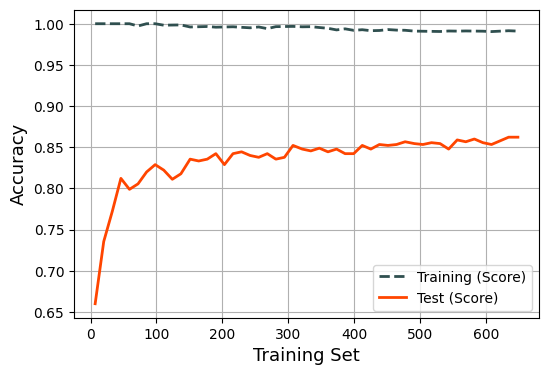

In [37]:
curva_de_aprendizado(modelo_rf, X_train_shuffled, y_train_shuffled)

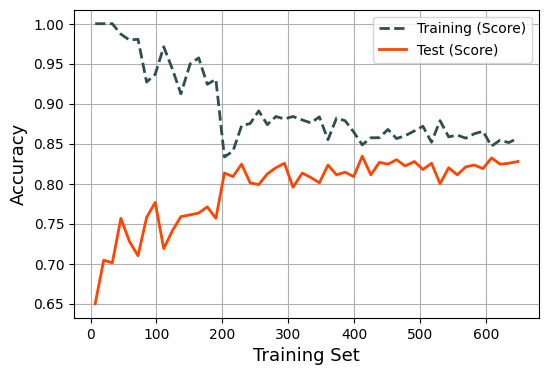

In [30]:
curva_de_aprendizado(modelo_rna, X_train_shuffled, y_train_shuffled)

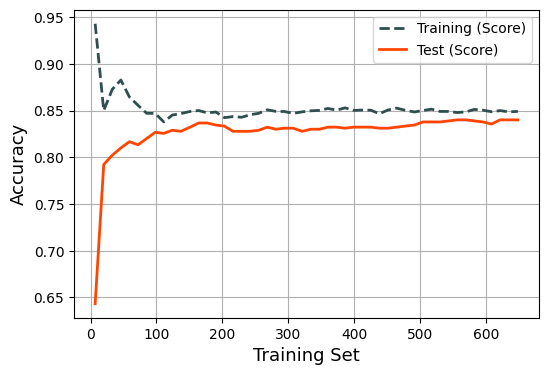

In [29]:
curva_de_aprendizado(svm, X_train_shuffled, y_train_shuffled)

# Curva ROC (Receiver Operating Characteristic Curve) e AUC (Area Under The Curve)
### AUC indica o quanto o modelo é capaz de distinguir entre as duas classes. Quanto maior o valor de AUC melhor é a performace do modelo em distinguir entre pacientes doentes e não doentes. O valor máximo de AUC (caso ideal) é 1.

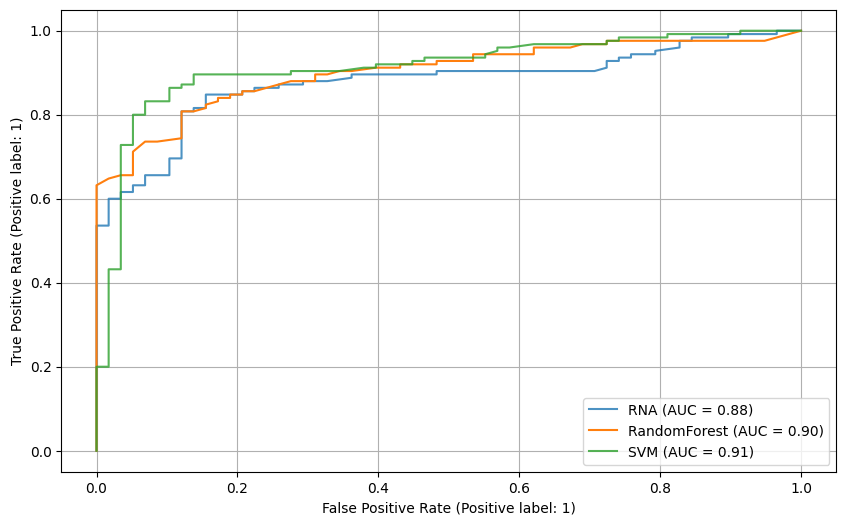

In [125]:


pipe_rf = Pipeline([('stdScaler', StandardScaler()), ('modelo_rf', modelo_rf)])
pipe_rf.fit(X_train_shuffled, y_train_shuffled)

pipe_rna = Pipeline([('stdScaler', StandardScaler()), ('modelo_rna', modelo_rna)])
pipe_rna.fit(X_train_shuffled, y_train_shuffled)

pipe_svm = Pipeline([('stdScaler', StandardScaler()), ('modelo_svm', svm)])
pipe_svm.fit(X_train_shuffled, y_train_shuffled)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.grid(True)

rna_dip = RocCurveDisplay.from_estimator(pipe_rna, X_test, y_test, ax=ax, alpha=0.8, name='RNA', pos_label=1)
rf_disp = RocCurveDisplay.from_estimator(pipe_rf, X_test, y_test,ax=ax, name='RandomForest', pos_label=1)
svm_disp = RocCurveDisplay.from_estimator(pipe_svm, X_test, y_test, ax=ax, alpha=0.8, name='SVM', pos_label=1)


# rf_disp.plot(ax=ax)



In [64]:
modelo_rna.fit(X_train_shuffled, y_train_shuffled)
modelo_rf.fit(X_train_shuffled, y_train_shuffled)
svm.fit(X_train_shuffled, y_train_shuffled)

rna_probs = modelo_rna.predict_proba(X_test)
rf_probs = modelo_rf.predict_proba(X_test)
svm_probs = svm.predict_proba(X_test)


In [66]:
rna_probs = rna_probs[:,1]
rf_probs = rf_probs[:,1]
svm_probs = svm_probs[:,1]

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

In [69]:
rna_auc = roc_auc_score(y_test, rna_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

In [72]:
print('RNA: AUROC = %.3f' % (rna_auc))
print('RF: AUROC = %.3f' % (rf_auc))
print('SVM: AUROC = %.3f' % (svm_auc))

RNA: AUROC = 0.927
RF: AUROC = 0.901
SVM: AUROC = 0.911
